In [1]:
####### When we did linear Regression we had One Dependent and One Independent Variable

In [2]:
###### When we go for multiple linear regression , we will have One Dpependent (Continious Data Type), we can have -----n number 
## of independent variable (any data type)

In [3]:
##### Several Phases  - Input Phase --- Training 

In [4]:
import seaborn as sns

In [5]:
df = sns.load_dataset('tips')

In [6]:
df.shape

(244, 7)

In [7]:
#### Divide the data in 80 : 20 ratio 

In [9]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [50]:
X = df[['total_bill','size']]  #### Independent variables
X.head(2)

,total_bill,size
0,16.99,2
1,10.34,3


In [51]:
y = df['tip']  #### Dependent Variables
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [12]:
#### We will divide the datasets into train and test data  --- to validate my models
#### We will use a library of Sklerean --- 
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)  #### It is randomly splitting the data

In [53]:
X_train.head()

,total_bill,size
73,25.28,2
203,16.40,2
148,9.78,2
226,10.09,2
153,24.55,4


In [17]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.1,random_state = 42)  ### Now it is not splitting

In [18]:
X_train1.head()

,total_bill,size
228,13.28,2
208,24.27,2
96,27.28,2
167,31.71,4
84,15.98,2


In [21]:
X_train.shape,X_test.shape

((195, 2), (49, 2))

In [22]:
y_train.shape,y_test.shape

((195,), (49,))

In [29]:
df[df.notnull()]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
from sklearn.linear_model import LinearRegression   ##### Algorithm 

In [54]:
model = LinearRegression()

In [55]:
#### Training Phase
model_train = model.fit(X_train,y_train)

In [56]:
#### Equation of St.line
y = (0.08555734*total_bill) + (0.27283799*size) + 0.5664794765770012
y

2.823302256577001

In [57]:
model_train.coef_  ### M1 and M2 values

array([0.09703574, 0.17177885])

In [58]:
model_train.intercept_

0.6165732346470003

In [35]:
total_bill = 20
size = 2

In [59]:
pred = model_train.predict(X_test)   #### Input Data  ### 20 % of my data
pred

array([2.25943953, 2.12650056, 3.22397482, 3.7295822 , 3.71209019,
       1.93728086, 2.02946482, 2.08477519, 1.62091876, 2.05081268,
       4.20796841, 4.60870045, 1.96251015, 3.34626543, 4.3719844 ,
       1.89167406, 2.1119452 , 5.06188295, 2.36908992, 2.22159559,
       3.17063074, 2.69901145, 3.05416227, 3.09205737, 1.99162088,
       3.13569787, 3.16769409, 3.06580656, 3.71982746, 2.73006288,
       4.89493032, 2.97459296, 3.75772257, 2.77472491, 3.31135815,
       2.6087682 , 3.08429451, 1.81113439, 3.29583243, 2.12747092,
       3.77125641, 2.50785103, 2.08671591, 2.54375426, 3.86540666,
       2.19151451, 2.27108382, 3.46658976, 2.68542644])

In [60]:
import pandas as pd
df1 = pd.DataFrame({'Actual': y_test,'Pred': pred,'Error': y_test - pred})
df1.shape

(49, 3)

In [61]:
df1.head()

,Actual,Pred,Error
158,2.61,2.259440,0.350560
70,1.97,2.126501,-0.156501
181,5.65,3.223975,2.426025
157,3.75,3.729582,0.020418
206,3.41,3.712090,-0.302090


In [62]:
model_train.score(X_train,y_train)  ### should be closed towards  --- 1

0.4928021467861188

In [63]:
model_train.score(X_test,y_test)

0.3267419325991294

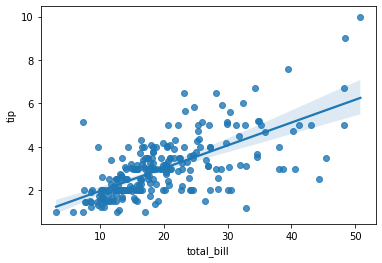

In [45]:
sns.regplot(x = 'total_bill', y = 'tip', data = df)

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mean_squared_error(y_test,pred)

1.4401916778501598

In [70]:
df.iloc[158]

total_bill     13.39
tip             2.61
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Gender             0
Name: 158, dtype: object

In [65]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder  ### if you have 2 categories

In [67]:
le = LabelEncoder()

In [68]:
df['Gender'] = le.fit_transform(df['sex'])

In [69]:
df

,total_bill,tip,sex,smoker,day,time,size,Gender
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [71]:
le.inverse_transform([0,0,1,1])

array(['Female', 'Female', 'Male', 'Male'], dtype=object)

In [72]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [73]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [75]:
df['Time_'] = le.fit_transform(df['time'])

In [76]:
df

,total_bill,tip,sex,smoker,day,time,size,Gender,Time_
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


In [81]:
### Dummies
lb = LabelEncoder()
df['Day_1'] = lb.fit_transform(df['day'])

In [82]:
lb.inverse_transform([0,1,1,0,2,3])

array(['Fri', 'Sat', 'Sat', 'Fri', 'Sun', 'Thur'], dtype=object)

In [83]:
df

,total_bill,tip,sex,smoker,day,time,size,Gender,Time_,Day_d,Day_1
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,2,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,2,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,2,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0,1,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1,1


In [85]:
del df['Day_d']
del df['Day_1']

In [86]:
df

,total_bill,tip,sex,smoker,day,time,size,Gender,Time_
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


In [88]:
g = pd.get_dummies(df['day'])

In [91]:
df2 = pd.concat([df,g],axis = 1)
df2

,total_bill,tip,sex,smoker,day,time,size,Gender,Time_,Thur,Fri,Sat,Sun
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,0,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,0,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,0,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,0,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0,0,0,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0,0,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,0,0,1,0


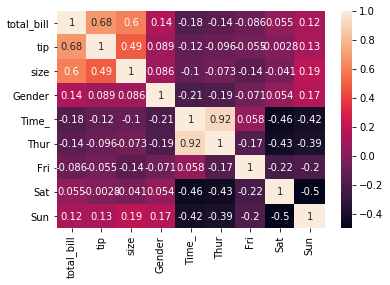

In [92]:
sns.heatmap(df2.corr(), annot = True)

In [93]:
df2.corr()['tip']

total_bill    0.675734
tip           1.000000
size          0.489299
Gender        0.088862
Time_        -0.121629
Thur         -0.095879
Fri          -0.055463
Sat          -0.002790
Sun           0.125114
Name: tip, dtype: float64